###### ДЗ 1 Классификация

*Креативная часть:* найти парамеры и комбинации их, которые будут увеличивать accuracy

*Техническая часть:* сделать под это всё удобные обёртки. Например, это функция, которая просто принимает список фичей, а на выходе показывает результат фита

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
def regres_accuracy(df, X, Y):
    
#     alldata = df[X + Y]
#     alldata = alldata.sample(frac=1)    
    allinput = df[X]
    alloutput = df[Y]
    
    chunk_80 = int(len(df) * 0.8)
    X_train = allinput[ :chunk_80]
    Y_train = alloutput[ :chunk_80]
    X_test = allinput[chunk_80: ]
    Y_test = alloutput[chunk_80: ]
#     X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.2)
    
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train.values.ravel())
    
    return model.score(X_train, Y_train)

In [3]:
def show_graph(x,y, xLabel, yLabel):
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),"r--")
    plt.scatter(x, y)
    plt.show()    

In [4]:
# Читаем источник
PATH = "./athletes_sochi.txt"
df = pd.read_csv(PATH).dropna()

df["gender_n"] = df["gender"].apply(lambda x: int(x == "Male"))
df["BMI"] = df["weight"] / (df["height"]**2)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


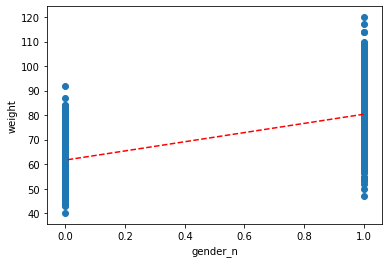

In [5]:
xLabel = "gender_n"
yLabel = 'weight'
show_graph(df[xLabel], df[yLabel],xLabel, yLabel)
# Видим, что медалей в некоторых странах женщины получают меньше, чем мужчины

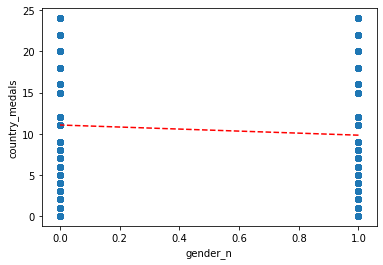

In [6]:
# Зададим для каждой страны общее количество медалей
countries = df[['country', 'total_medals']].groupby(['country']).sum().reset_index()
df["country_medals"] = df["country"].apply(lambda x: countries.loc[countries['country'] == x].values[0][1])
yLabel = 'country_medals'
show_graph(df[xLabel], df[yLabel],xLabel, yLabel)

In [7]:
# Начальное значение точности
regres_accuracy(df, ['height','weight'], ["gender_n"])

0.848714069591528

In [8]:
# Добавим BMI
regres_accuracy(df, ['height','weight','BMI'], ["gender_n"])

0.8638426626323752

In [9]:
# Добавим country_medals
regres_accuracy(df, ['height','weight','BMI','country_medals'], ["gender_n"])

0.8683812405446294

Таким образом BMI и количество медалей страны повышают точность предсказывания пола участников